<span style="font-size: 14pt">MIPT, Advanced ML, Spring 2018</span>

<span style="font-size: 16pt"> HW #5: Linear Models 

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'"> alexromsput@gmail.com</span>


<h1 align="center">Organization Info</h1> 

* Дедлайн **11 апреля 2018 02:59** для всех групп.
* В качестве решения задания нужно прислать ноутбук с подробными комментариями (<span style='color:red'> без присланного решения результат контеста не будет засчитан </span>).
* <span style='color:red'>Название команды в контесте должно соответствовать шаблону: НомерГруппы_Имя_Фамилия, например, 594_Ivan_Ivanov</span>.

**Оформление дз**: 
- Присылайте выполненное задание на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall_<номер_группы>_<фамилия>``, к примеру -- ``ML2018_fall_495_ivanov``
- Выполненное дз сохраните в файл ``<фамилия>_<группа>_task<номер>.ipnb, к примеру`` -- ``ivanov_401_task5.ipnb``

**Вопросы**:
- Присылайте вопросы на почту ``ml.course.mipt@gmail.com``
- Укажите тему письма в следующем формате ``ML2018_fall Question <Содержание вопроса>``


--------
- **PS1:** Используются автоматические фильтры, и просто не найдем ваше дз, если вы неаккуратно его подпишите.
- **PS2:**  Просроченный дедлайн снижает максимальный вес задания по формуле, указнной на первом семинаре
- **PS3:** Допустимы исправление кода предложенного кода ниже, если вы считаете

<h1 align="center">Check Questions </h1> 

Ниже приводится список вопросов, с ответами на которые может быть полезно разобраться
для понимания темы.

**1.** Как выглядит решающее правило в линейной классификации? А зависимость, которой мы приближаем ответы в линейной регрессии?

**2.** Что такое функции потерь в задачах классификации и регрессии? Зачем они нужны?

**3.** Что такое регуляризаторы? Какими они бывают в задачах линейной классификации и регрессии? Зачем они нужны?

**4.** Как в общем виде выглядит оптимизационная задача в линейной классификации или линейной регрессии?

**5.** Как работает настройка весов в линейной модели с помощью SGD (Stochastic Gradient Decent)? Как выглядит правило обновления весов?

**6.** Учитывается ли коэффициент сдвига w0 в регуляризаторе? Почему?

**7.** Почему линейные модели рекомендуется применять к выборке с нормированными значениями признаков?

**8.** Как выглядит оптимизационная задача в логистической регрессии? А в SVM?

**9.** Выпишите и докажите формулу для весов в линейной регрессии (с квадратичной функцией потерь).
То же самое для гребневой регрессии.

**10.** Выпишите SGD для логистической регрессии с $l2$-регуляризацией и для SVM с линейным ядром.

**11.** В чем заключается идея ядер в SVM?

**12.** Какие преимущества и недостатки есть у линейных моделей?

**13.** На какие 3 матрицы раскладывается произвольная матрица при SVD? Что такое сингулярные числа

<h1 align="center">Contest 1 (40%)</h1> 
** Ссылка на контест: ** https://www.kaggle.com/t/68e2660e41d94d64a3c2251a1df16ab3

# Критерии оценивания
Для того чтобы получить оценку нужно
* 1) прислать код вашей модели (можно использовать только линейные модели), которая выдает один из финальных сабмиттов.
* 2) чтобы получить
    - хор (5)  и выше нужно превзойти результат benchmark_1;
    - отл (8) и выше нужно превзойти результат benchmark_2;
* 3) Ваше имя в лидерборде должно иметь вид <НомерГруппы>\_Имя\_Фамилия, например: 594\_Иван\_Иванов. Если имя не будет соответствовать формату организаторы вправе снизить оценку.

#### Краткое описание того, что предпринималось для построения модели:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from imblearn.over_sampling import SMOTE, ADASYN

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df_train = pd.read_csv('train.csv')
df_train.drop('id', axis=1, inplace=True)

X_train = df_train.loc[:, df_train.columns != 'label']
Y_train = df_train['label']

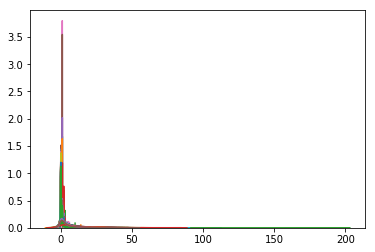

In [3]:
#смотрим на данные
for column in X_train.columns:
    sns.kdeplot(X_train[column], legend=False)

#все около нуля, длинный хвост справа

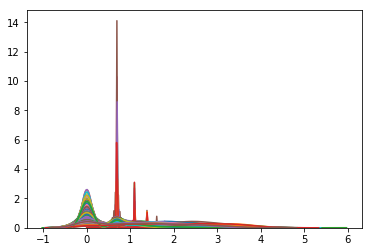

In [4]:
#применяем логарифмическое преобразование для каждой фичи

for column in X_train.columns:
    sns.kdeplot(np.log(X_train[column] + 1), legend=False)

#выглядит лучше
#заметно несколько пиков, но в итоге я их никак не обработал

In [5]:
#как и говорили, выборка несбалансирована, появилась идея познакомиться с oversampling

df = pd.DataFrame(Y_train.value_counts())
df['Percentage'] = 100 * df['label'] / Y_train.shape[0]
print(df)

   label  Percentage
1    573   63.666667
0    327   36.333333


In [ ]:
#для oversampling использовались SMOTE и ADASYN
#дальше по cross_val смотрелся score для различных классификаторов, некоторые примеры ниже

In [6]:
clf = LogisticRegression(penalty='l2', C=0.2)

X_resampled, y_resampled = SMOTE().fit_sample(X_train, Y_train)
score = cross_val_score(clf, X_resampled, y_resampled, scoring='roc_auc', cv=5).mean()
print(score)

X_resampled, y_resampled = ADASYN().fit_sample(X_train, Y_train)
score = cross_val_score(clf, X_resampled, y_resampled, scoring='roc_auc', cv=5).mean()
print(score)

0.955191929347
0.947874425278


In [13]:
clf = SVC(kernel='poly', degree=5)

X_resampled, y_resampled = SMOTE().fit_sample(X_train, Y_train)
score = cross_val_score(clf, X_resampled, y_resampled, scoring='roc_auc', cv=5).mean()
print(score)

X_resampled, y_resampled = ADASYN().fit_sample(X_train, Y_train)
score = cross_val_score(clf, X_resampled, y_resampled, scoring='roc_auc', cv=5).mean()
print(score)

0.983477430019
0.97978973274


In [15]:
#в итоге был выбран SVC, для которого был произведен подбор параметров

Cs = [0.001, 0.01, 0.1, 1, 10]
gammas = [0.001, 0.01, 0.1, 1]
degrees = [2, 3, 4, 5, 6, 7]
param_grid = {'C': Cs, 'gamma' : gammas, 'degree' : degrees}

grid_search = GridSearchCV(SVC(kernel='poly'), param_grid, scoring='roc_auc', cv=10)
grid_search.fit(X_resampled, y_resampled)
print(grid_search.best_params_)

# при тестировании лучшими параметрами были : {'C': 0.001, 'degree': 6, 'gamma': 0.1}
# проблема я так понимаю в том, что я не указываю random seed

{'C': 0.001, 'degree': 4, 'gamma': 0.001}


#### Код окончательной попытки:

In [16]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE

In [17]:
df_train = pd.read_csv('train.csv')
df_train.drop('id', axis=1, inplace=True)

X_train = df_train.loc[:, df_train.columns != 'label']
Y_train = df_train['label']

In [18]:
X_train = np.log(X_train + 1)

In [19]:
clf = SVC(kernel='poly', C=0.001, degree=6,gamma=0.1)

X_resampled, y_resampled = SMOTE().fit_sample(X_train, Y_train)
clf.fit(X_resampled, y_resampled)

SVC(C=0.001, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=6, gamma=0.1, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [20]:
df_test = pd.read_csv('test.csv')
df_test.drop('id', axis=1, inplace=True)

In [21]:
df_test = np.log(df_test + 1)
y_pred = clf.predict(df_test)

In [22]:
df_out = pd.DataFrame({"id" : range(1, 1 + len(y_pred)), "label" : y_pred})
df_out.to_csv("sample_submission_3.csv", index=False)

<h1 align="center">Contest 2 (40%)</h1> 
* Ссылка на контест: https://www.kaggle.com/t/2343d1882c6842258e3825b4a8a1e5a8

# Критерии оценивания
Для того чтобы получить оценку нужно
* 1) Прислать код вашей модели, которая выдает один из финальных сабмиттов.
* 2) чтобы получить
    - хор (5)  и выше нужно превзойти результат benchmark_1;
    - отл (8) и выше нужно превзойти результат benchmark_2;
* 3) Ваше имя в лидерборде должно иметь вид <НомерГруппы>\_Имя\_Фамилия, например: 594\_Иван\_Иванов. Если имя не будет соответствовать формату организаторы вправе снизить оценку.

In [23]:
# import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import Pipeline, make_pipeline

(30000, 4)


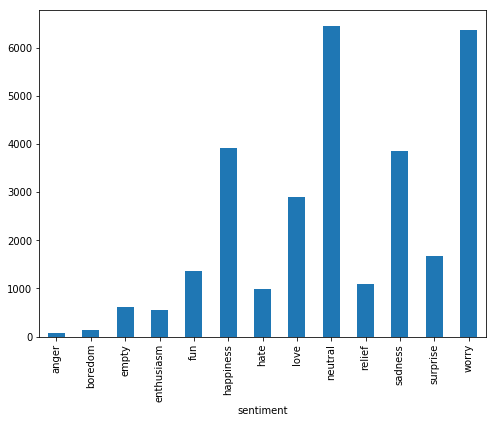

In [25]:
df_train = pd.read_csv('train.csv')
print(df_train.shape)

fig = plt.figure(figsize=(8,6))
df_train.groupby('sentiment').content.count().plot.bar(ylim=0)
plt.show()

Опять несбалансированность, но в этот раз ничего не делаем (не понятно что можно предпринять).

*Что дальше:*

Пользуемся идеей Bag of Words. Применяем CountVectorizer, TfidfVectorizer (первый, что довольно странно, показывает себя лучше). Тестируем с разными параметрами - использование стоп-слов "english" ухудшает score, добавление биграмм, ... - аналогично.

Тестируем с разными классификаторами, Логарифмическая Регрессия показывает себя лучше всех.

Как результат - следующий код:

In [26]:
df_train = pd.read_csv('train.csv')

pipe = Pipeline([('vect', CountVectorizer()), ('reg', LogisticRegression())])

param_grid = {'vect__min_df': [3], 'reg__C': [1e-5, 1e-3, 1e-1, 1e0, 1e1, 1e2], 
                'reg__penalty': ['l2', 'l1']}

grid = GridSearchCV(pipe, cv=3, n_jobs=1, param_grid=param_grid, scoring='accuracy')
grid.fit(df_train.content, df_train.sentiment)

print(grid.best_params_)

{'reg__C': 0.1, 'reg__penalty': 'l2', 'vect__min_df': 3}


In [27]:
pipeline = make_pipeline(CountVectorizer(min_df=3), LogisticRegression(penalty='l2', C=0.1))

In [28]:
pipeline.fit(df_train.content, df_train.sentiment)

Pipeline(memory=None,
     steps=[('countvectorizer', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=3,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
  ...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [29]:
df_test = pd.read_csv('test.csv')

y_pred = pipeline.predict(df_test.content)
df_out = pd.DataFrame({"id" : df_test.id, "sentiment" : y_pred})
df_out.to_csv("sampleSubmission.csv", index=False)

<h1 align="center">Теоретические задачи (20%)</h1> 

** Задача 1**
Покажите, что регуляризатор в задаче линейной классификации имеет вероятностный смысл априорного распределения параметров моделей. Какие распределения задают 𝑙1-регуляризатор и 𝑙2-регуляризатор?

** Задача 2**
Покажите, что в случае линейно разделимой выборки функционал, максимизируемый при обучении логистической регрессии, достигает своего максимума в бесконечности (при бесконечно больших значениях компонент вектора весов), а значит для процесса обучения необходимо добавить регуляризационный член.

** Задача 3**
Задана выборка объектов, каждый из которых принадлежит одному из двух классов $Y = \{1; -1\}$. В некотором спрямляющем пространстве, задаваемом ядром $K_1(x_1; x_2)$, эта выборка является линейно разделимой, а в некотором спрямляющем пространстве, задаваемом ядром $K_2(x_1; x_2)$, не является линейно разделимой. Существует ли спрямляемое пространство, задаваемое ядром $K(x_1; x_2) = K_1(x_1; x_2) + K_2(x_1; x_2)$, в котором эта выборка будет линейно разделимой?

** Задача 4**
Покажите, что если предварительно центрировать выборку в задаче линейной регрессии, то параметр сдвига $𝑤_0$ (коэффициент перед константой) получится равным нулю.